In [1]:
!git clone https://github.com/lattice-ai/DeepLabV3-Plus -b tpu
%cd DeepLabV3-Plus

fatal: destination path 'DeepLabV3-Plus' already exists and is not an empty directory.
/kaggle/working/DeepLabV3-Plus


In [2]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from kaggle_datasets import KaggleDatasets
from deeplabv3plus.datasets import AugmentationFactory
from deeplabv3plus.datasets.tfrecords.tfrecord_loader import TFRecordLoader

In [3]:
GCS_PATH = KaggleDatasets().get_gcs_path('human-segmentation-tfrecords')
print(GCS_PATH)

gs://kds-15ddbb4886a014c7982845e3ab2128ec2063798656057465e4ea2757


In [4]:
TRAIN_TFRECORDS = tf.io.gfile.glob(
    os.path.join(
        GCS_PATH,
        'human-segmentation-tfrecords/human-segmentation-train/*.tfrec'
    )
)

TRAIN_TFRECORDS[:5]

['gs://kds-15ddbb4886a014c7982845e3ab2128ec2063798656057465e4ea2757/human-segmentation-tfrecords/human-segmentation-train/train-0-256.tfrec',
 'gs://kds-15ddbb4886a014c7982845e3ab2128ec2063798656057465e4ea2757/human-segmentation-tfrecords/human-segmentation-train/train-1-256.tfrec',
 'gs://kds-15ddbb4886a014c7982845e3ab2128ec2063798656057465e4ea2757/human-segmentation-tfrecords/human-segmentation-train/train-10-256.tfrec',
 'gs://kds-15ddbb4886a014c7982845e3ab2128ec2063798656057465e4ea2757/human-segmentation-tfrecords/human-segmentation-train/train-100-256.tfrec',
 'gs://kds-15ddbb4886a014c7982845e3ab2128ec2063798656057465e4ea2757/human-segmentation-tfrecords/human-segmentation-train/train-101-256.tfrec']

In [5]:
loader = TFRecordLoader(image_size=512)
dataset = loader.get_dataset(train_tfrecord_files=TRAIN_TFRECORDS, ignore_order=False)

In [6]:
dataset

<ParallelMapDataset shapes: ((512, 512, 3), (512, 512, 1)), types: (tf.float32, tf.float32)>

In [7]:
x, y = next(iter(dataset))
x.shape, y.shape

(TensorShape([512, 512, 3]), TensorShape([512, 512, 1]))

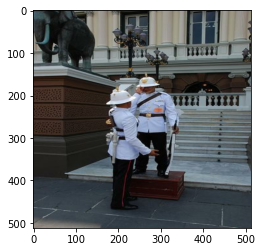

In [8]:
x = (x + 1) * 127.5
plt.imshow(x.numpy().astype(np.uint8))

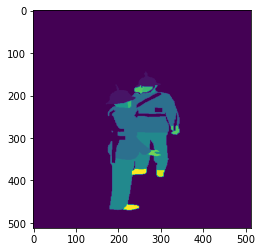

In [9]:
plt.imshow(y.numpy().astype(np.uint8))

In [10]:
augmentation_factory = AugmentationFactory(apply_horizontal_flip=True, apply_jitter=True)
augmented_dataset = augmentation_factory.augment_dataset(dataset)
augmented_dataset

<ParallelMapDataset shapes: ((512, 512, 3), (512, 512, 1)), types: (tf.float32, tf.float32)>

In [11]:
x, y = next(iter(dataset))
x.shape, y.shape

(TensorShape([512, 512, 3]), TensorShape([512, 512, 1]))

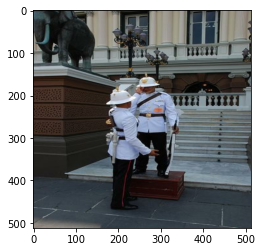

In [12]:
x = (x + 1) * 127.5
plt.imshow(x.numpy().astype(np.uint8))

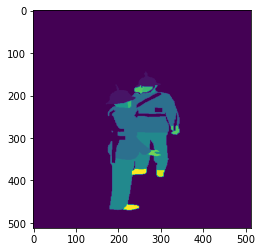

In [13]:
plt.imshow(y.numpy().astype(np.uint8))